# Importing necessary Libraries

In [12]:
import numpy
import pandas as pd
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [3]:
dataset = pd.read_csv('telecommunications_churn.csv')
dataset

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56,0
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24,0
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29,0
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,50.90,88,5.26,89,8.86,7,1.78,66.80,0
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,1,36,156.2,215.5,279.1,9.9,2,0,77,26.55,126,18.32,83,12.56,6,2.67,60.10,0
3329,68,0,0,231.1,153.4,191.3,9.6,3,0,57,39.29,55,13.04,123,8.61,4,2.59,63.53,0
3330,28,0,0,180.8,288.8,191.9,14.1,2,0,109,30.74,58,24.55,91,8.64,6,3.81,67.74,0
3331,184,0,0,213.8,159.6,139.2,5.0,2,1,105,36.35,84,13.57,137,6.26,10,1.35,57.53,0


# Exploratory Data Analysis

In [4]:
dataset.shape

(3333, 19)

In [5]:
dataset.dtypes

account_length              int64
voice_mail_plan             int64
voice_mail_messages         int64
day_mins                  float64
evening_mins              float64
night_mins                float64
international_mins        float64
customer_service_calls      int64
international_plan          int64
day_calls                   int64
day_charge                float64
evening_calls               int64
evening_charge            float64
night_calls                 int64
night_charge              float64
international_calls         int64
international_charge      float64
total_charge              float64
churn                       int64
dtype: object

In [6]:
dataset.groupby('churn').size()

churn
0    2850
1     483
dtype: int64

In [7]:
dataset.describe()

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,0.276628,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,0.096910,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,59.449754,0.144914
std,39.822106,0.447398,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,0.295879,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,10.502261,0.352067
min,1.000000,0.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,22.930000,0.000000
25%,74.000000,0.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,0.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,52.380000,0.000000
50%,101.000000,0.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,0.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,59.470000,0.000000
75%,127.000000,1.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,0.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,66.480000,0.000000
max,243.000000,1.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,1.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,96.150000,1.000000


# Visual Representation

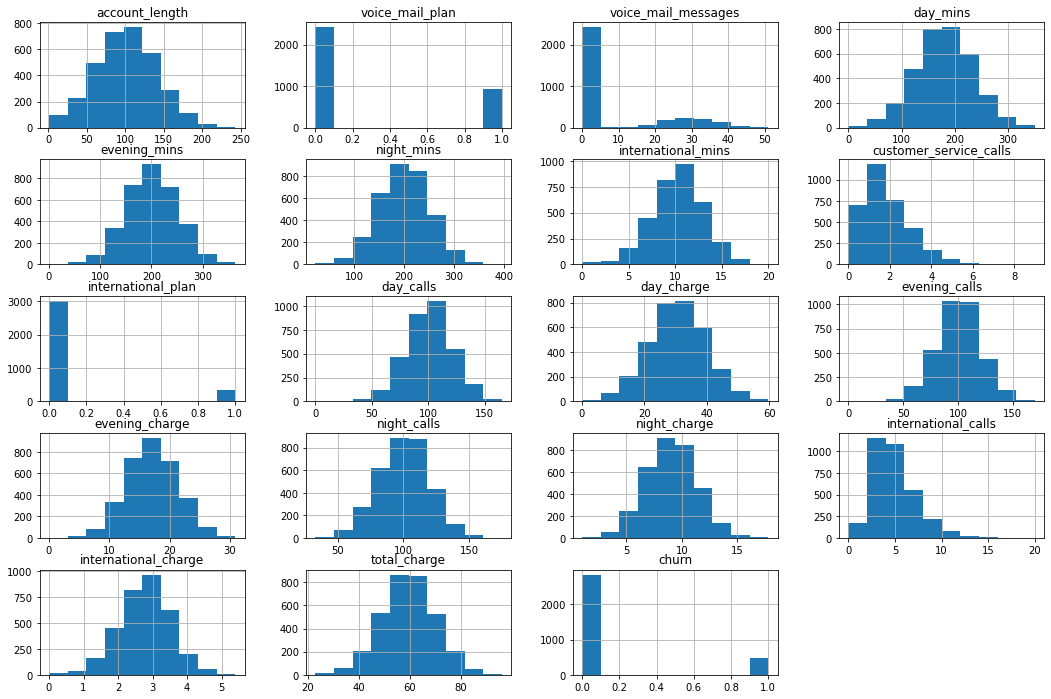

In [8]:
dataset.hist(figsize=(18, 12))
pyplot.show()

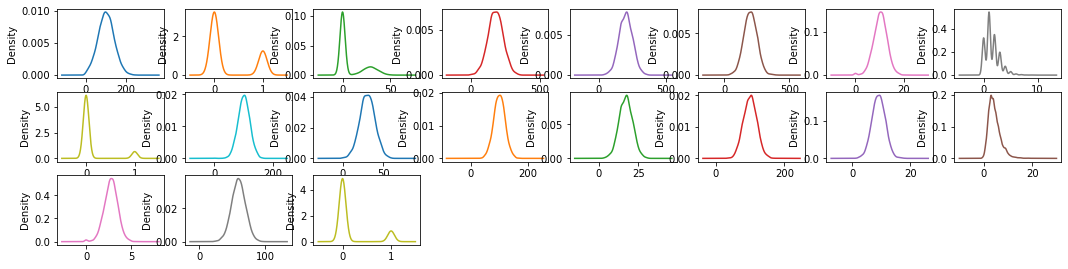

In [9]:
dataset.plot(kind='density',
             figsize=(18, 12),
             subplots=True,
             layout=(8, 8),
             sharex=False,
             legend=False)
pyplot.show()

<AxesSubplot:>

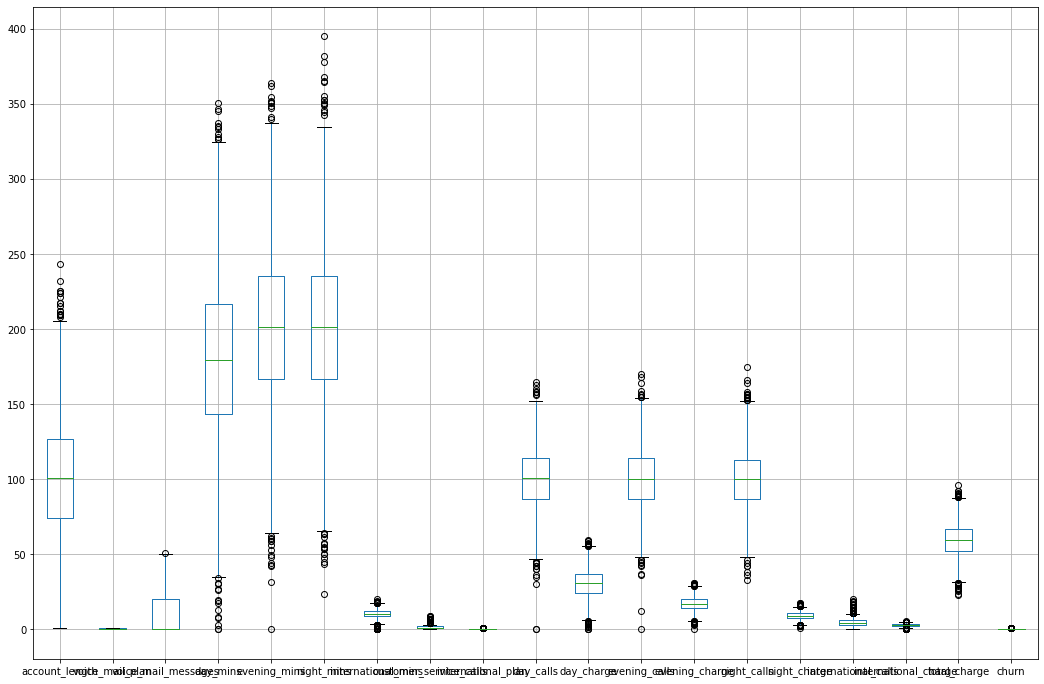

In [10]:
dataset.boxplot(figsize=(18, 12))

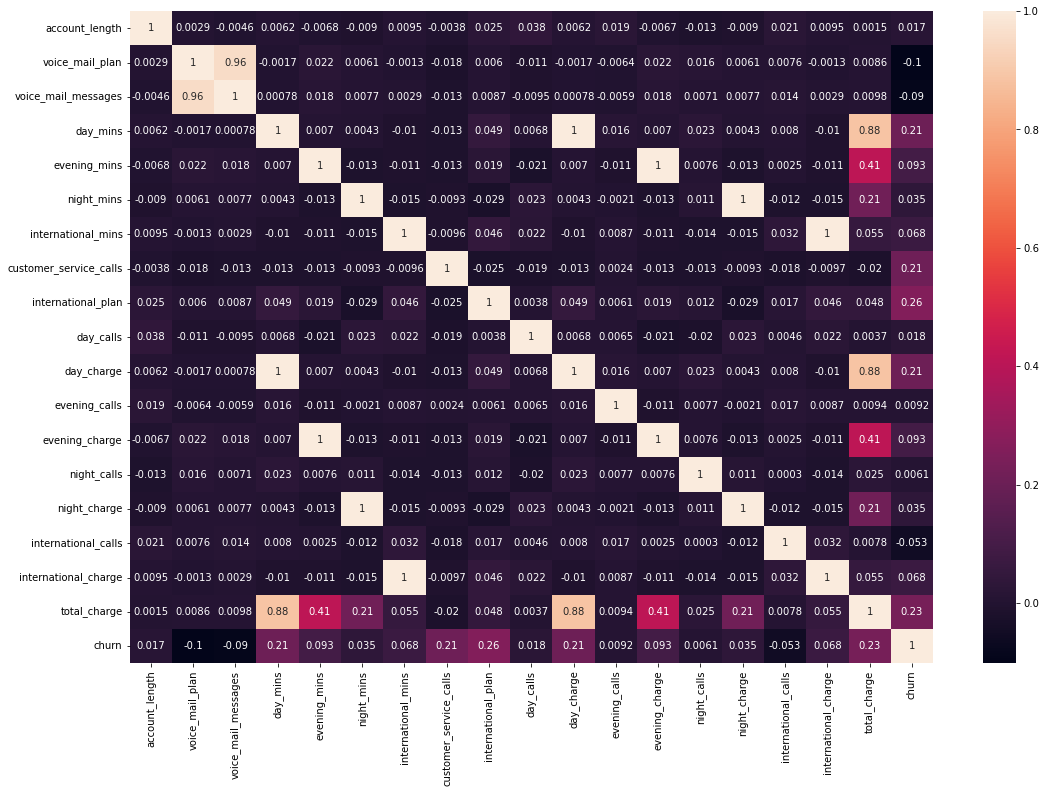

In [14]:
import seaborn as sns
fig = pyplot.figure(figsize=(18,12))
ax = fig.add_subplot(111)
cax = sns.heatmap(dataset.corr(),annot = True)
pyplot.show()

# Data preparation for Model Building

In [11]:
x = dataset.drop('churn',axis = 1)
y = dataset[['churn']]
X_train, X_validation, Y_train, Y_validation = train_test_split(x, y, test_size=0.20, random_state=12)

# Evaluating the Algorithm

## Checking which algorithm is the best

In [12]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model,
                                 X_train,
                                 Y_train,
                                 cv=kfold,
                                 scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.849948 (0.019367)
KNN: 0.874701 (0.012970)
CART: 0.946348 (0.011077)
NB: 0.869095 (0.018294)
SVM: 0.853702 (0.016692)


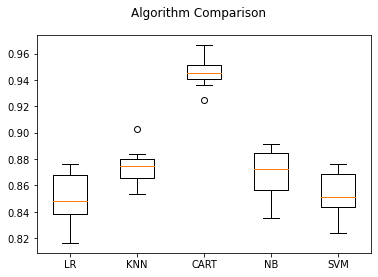

In [13]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## Standardize the dataset

In [14]:
pipelines = []
pipelines.append(('ScaledLR',Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledKNN',Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART',Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()), ('SVM', SVC())])))

results = []
names = []

for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model,
                                 X_train,
                                 Y_train,
                                 cv=kfold,
                                 scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.860833 (0.018150)
ScaledKNN: 0.899845 (0.018151)
ScaledCART: 0.944852 (0.010252)
ScaledNB: 0.869095 (0.018294)
ScaledSVM: 0.923098 (0.013483)


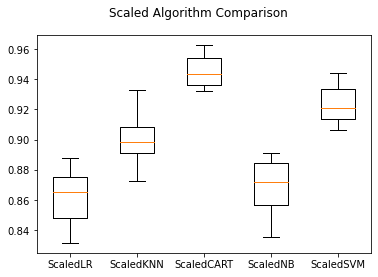

In [15]:
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## Tune Scaled KNN

In [18]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

neighbors = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
param_grid = dict(n_neighbors=neighbors)

model = KNeighborsClassifier()
kfold = KFold(n_splits=10, random_state=None)

grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    scoring='accuracy',
                    cv=kfold)

grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" %(grid_result.best_score_, grid_result.best_params_))

Best: 0.902092 using {'n_neighbors': 7}


In [19]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

In [20]:
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.872459 (0.013170) with: {'n_neighbors': 1}
0.897211 (0.014353) with: {'n_neighbors': 3}
0.899842 (0.019582) with: {'n_neighbors': 5}
0.902092 (0.018958) with: {'n_neighbors': 7}
0.894969 (0.014834) with: {'n_neighbors': 9}
0.891969 (0.014716) with: {'n_neighbors': 11}
0.892343 (0.016020) with: {'n_neighbors': 13}
0.891217 (0.016463) with: {'n_neighbors': 15}
0.889717 (0.015696) with: {'n_neighbors': 17}
0.888214 (0.014566) with: {'n_neighbors': 19}
0.885212 (0.013412) with: {'n_neighbors': 21}


# Apply Ensemble Methods

In [21]:
ensembles = []

ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))

results = []
names = []

for name, model in ensembles:
    kfold = KFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model,
                                 X_train,
                                 Y_train,
                                 cv=kfold,
                                 scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.899844 (0.019103)
GBM: 0.974485 (0.009029)
RF: 0.974111 (0.009723)
ET: 0.942984 (0.012537)


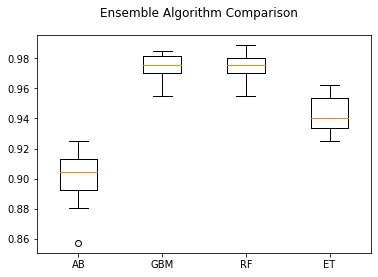

In [22]:
fig = pyplot.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# Finalize the Model

In [23]:
x = dataset.drop('churn',axis = 1)
y = dataset[['churn']]
X_train, X_validation, Y_train, Y_validation = train_test_split(x, y, test_size=0.20, random_state=12)

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = RandomForestClassifier()
model.fit(rescaledX, Y_train)

RandomForestClassifier()

In [24]:
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
predictions

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,

In [25]:
print(accuracy_score(Y_validation, predictions))

0.9880059970014993


In [26]:
print(confusion_matrix(Y_validation, predictions))

[[574   0]
 [  8  85]]


In [27]:
from pickle import dump
from pickle import load

In [28]:
filename = 'finalized_model.sav'
dump(model, open('filename', 'wb'))

In [29]:
# load the model from disk
loaded_model = load(open('filename', 'rb'))

result = loaded_model.score(rescaledValidationX, Y_validation)
print(result)

0.9880059970014993
